# Загрузка Pandas и очистка данных

In [1]:
import pandas as pd
import re
from collections import Counter
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import numpy as np

In [2]:
df = pd.read_csv(r'B:\SKILL_FACTORY\main_task.csv')

Restaurant_id — идентификационный номер ресторана / сети ресторанов;

City — город, в котором находится ресторан;

Cuisine Style — кухня или кухни, к которым можно отнести блюда, предлагаемые в ресторане;

Ranking — место, которое занимает данный ресторан среди всех ресторанов своего города;

Rating — рейтинг ресторана по данным TripAdvisor (именно это значение должна будет предсказывать модель);

Price Range — диапазон цен в ресторане;

Number of Reviews — количество отзывов о ресторане;

Reviews — данные о двух отзывах, которые отображаются на сайте ресторана;

URL_TA — URL страницы ресторана на TripAdvosor;

ID_TA — идентификатор ресторана в базе данных TripAdvisor.

In [3]:
display(df)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963
...,...,...,...,...,...,...,...,...,...,...
39995,id_499,Milan,"['Italian', 'Vegetarian Friendly', 'Vegan Opti...",500.0,4.5,$$ - $$$,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414
39996,id_6340,Paris,"['French', 'American', 'Bar', 'European', 'Veg...",6341.0,3.5,$$ - $$$,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036
39997,id_1649,Stockholm,"['Japanese', 'Sushi']",1652.0,4.5,NaN,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615
39998,id_640,Warsaw,"['Polish', 'European', 'Eastern European', 'Ce...",641.0,4.0,$$ - $$$,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


# В данном датасете имеется:

3 числовых признака

7 строковых признака

Датасет состоит из 40000 строк, в датасете 10 колонок.

In [5]:
df.isna().sum()

Restaurant_id            0
City                     0
Cuisine Style         9283
Ranking                  0
Rating                   0
Price Range          13886
Number of Reviews     2543
Reviews                  0
URL_TA                   0
ID_TA                    0
dtype: int64

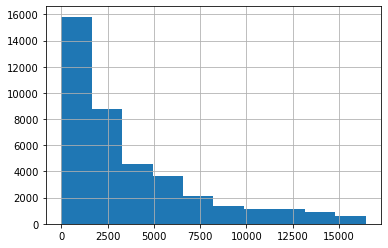

In [6]:
df['Ranking'].hist()

Из гистограммы можно увидеть,что существенная часть ресторанов входит в топ 5000 мест.

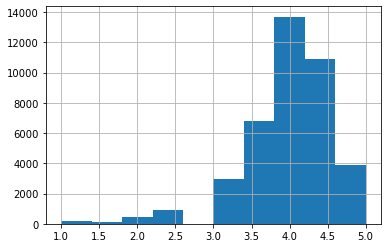

In [7]:
df['Rating'].hist()

Существенная часть ресторанов имеет нормальное растределение от 3 до 5, лишь некоторая от 1 до 2.5.

In [8]:
df['City'].value_counts().head()

London       5757
Paris        4897
Madrid       3108
Barcelona    2734
Berlin       2155
Name: City, dtype: int64

Из всех стран, представленных в датасете, только 4 существенно выделяются [London, Paris, Madrid, Barcelona]

In [9]:
def price_range(row):
    '''Функция по замене символов на более понятные значения'''

    if row == '$':
        return 'low'
    elif row == '$$ - $$$':
        return 'middle'
    else:
        return 'high'

In [10]:
def row_to_time(row):
    '''Функция по приведению строки в единый формат даты'''

    if int(row[0][:row[0].find('/')]) <= 12:
        if len(row) == 1:
            return list([datetime.strptime(row[0], '%m/%d/%Y'), datetime.strptime(row[0], '%m/%d/%Y')])
        elif len(row) == 2:
            return list([datetime.strptime(row[0], '%m/%d/%Y'), datetime.strptime(row[1], '%m/%d/%Y')])
    else:
        if len(row) == 1:
            return list([datetime.strptime(row[0][row[0].find('/')+1: -5] + '/' + row[0][:row[0].find('/')] + '/' + row[0][-4:], '%m/%d/%Y'),
                         datetime.strptime(row[0][row[0].find('/')+1: -5] + '/' + row[0][:row[0].find('/')] + '/' + row[0][-4:], '%m/%d/%Y')])
        elif len(row) == 2:
            return list([datetime.strptime(row[0][row[0].find('/')+1: -5] + '/' + row[0][:row[0].find('/')] + '/' + row[0][-4:], '%m/%d/%Y'),
                         datetime.strptime(row[1][row[1].find('/')+1: -5] + '/' + row[1][:row[1].find('/')] + '/' + row[1][-4:], '%m/%d/%Y')])

In [11]:
def add_dummies(df, column):
    '''Функция по добавлению в датафрейм dummie-переменных'''

    dummies = pd.get_dummies(df[column], prefix=column)
    return df.join(dummies)

In [12]:
df.drop(['Restaurant_id','City','Cuisine Style','Price Range','Reviews','URL_TA','ID_TA'], axis = 1).corr()

,Ranking,Rating,Number of Reviews
Ranking,1.000000,-0.368371,-0.222670
Rating,-0.368371,1.000000,0.030964
Number of Reviews,-0.222670,0.030964,1.000000


Исходя из таблицы корреляции:
сильнее всего коррелирует целевой признак с признаком "Ranking", так как чем меньше место (чем ближе к 1), тем выше рейтинг.

In [13]:
df['Price Range'] = df['Price Range'].dropna().apply(lambda x: price_range(x))
df['Price Range'] = df['Price Range'].fillna('middle')

Замена символов на более понятные значения благодаря функции price_range(), и заполнение None значений на 'middle'

In [14]:
df['Cuisine Style'] = df['Cuisine Style'].dropna().apply(lambda x: x[1:-1].replace("'", '').replace(' ', '').split(','))

count = Counter()
for x in df['Cuisine Style'].dropna():
    for i in x:
        count[i] += 1

cousine_list = []
count = count.most_common(5)
for i in count:
    cousine_list.append(i[0])

df['Cuisine Style'] = df['Cuisine Style'].fillna(0).apply(lambda x: cousine_list if x == 0 else x)

Замена None значений на 5 видов самых популярных кухонь.

In [15]:
pattern = re.compile('\d+/\d+/\d+')
df['Reviews'] = df['Reviews'].apply(lambda x: pattern.findall(x))
df['Reviews'] = df['Reviews'].apply(lambda x: None if len(x) == 0 else x)
df['Reviews'] = df['Reviews'].dropna().apply(lambda x: row_to_time(x))
df['Date_Reviews'] = df['Reviews']
df = df.drop(['Reviews'], axis=1)

Создание столбца с датами отзывов.

In [16]:
df['Number of Reviews'] = df['Number of Reviews'].fillna(round(df['Number of Reviews'].mean()))

Заполнение None значений средним в столбце.

In [17]:
df.isna().sum()

Restaurant_id           0
City                    0
Cuisine Style           0
Ranking                 0
Rating                  0
Price Range             0
Number of Reviews       0
URL_TA                  0
ID_TA                   0
Date_Reviews         6473
dtype: int64

In [18]:
df.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,URL_TA,ID_TA,Date_Reviews
0,id_5569,Paris,"[European, French, International]",5570.0,3.5,middle,194.0,/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,"[2017-12-31 00:00:00, 2017-11-20 00:00:00]"
1,id_1535,Stockholm,"[VegetarianFriendly, European, Mediterranean, ...",1537.0,4.0,middle,10.0,/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,"[2017-07-06 00:00:00, 2016-06-19 00:00:00]"
2,id_352,London,"[Japanese, Sushi, Asian, Grill, VegetarianFrie...",353.0,4.5,high,688.0,/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781,"[2018-01-08 00:00:00, 2018-01-06 00:00:00]"
3,id_3456,Berlin,"[VegetarianFriendly, European, Mediterranean, ...",3458.0,5.0,middle,3.0,/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776,NaN
4,id_615,Munich,"[German, CentralEuropean, VegetarianFriendly]",621.0,4.0,middle,84.0,/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963,"[2017-11-18 00:00:00, 2017-02-19 00:00:00]"


In [19]:
df = add_dummies(df, 'City')
df = add_dummies(df, 'Price Range')

cuisine_styles = set()
for row in df['Cuisine Style']:
    for i in row:
        cuisine_styles.add(i)

for style in cuisine_styles:
    df[style] = df['Cuisine Style'].apply(lambda x: 1 if style in x else 0)

df['Cuisine Count'] = df['Cuisine Style'].apply(lambda x: len(x))

df = df.drop(['Restaurant_id', 'City', 'Cuisine Style',
              'Price Range', 'Date_Reviews', 'URL_TA', 'ID_TA'], axis=1)

In [20]:
df

,Ranking,Rating,Number of Reviews,City_Amsterdam,City_Athens,City_Barcelona,City_Berlin,City_Bratislava,City_Brussels,City_Budapest,...,Taiwanese,British,Fujian,Slovenian,Ukrainian,Scottish,Latvian,Swedish,Singaporean,Cuisine Count
0,5570.0,3.5,194.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
1,1537.0,4.0,10.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
2,353.0,4.5,688.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
3,3458.0,5.0,3.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,5
4,621.0,4.0,84.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,500.0,4.5,79.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
39996,6341.0,3.5,542.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
39997,1652.0,4.5,4.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
39998,641.0,4.0,70.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели

In [21]:
# Х - данные с информацией о ресторанах, у - целевая переменная (рейтинги ресторанов)
X = df.drop(['Rating'], axis = 1)
y = df['Rating']

In [22]:
# Загружаем специальный инструмент для разбивки:
from sklearn.model_selection import train_test_split

In [23]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.
# Для тестирования мы будем использовать 25% от исходного датасета.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Создаём, обучаем и тестируем модель

In [24]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [25]:
# Создаём модель
regr = RandomForestRegressor(n_estimators=100)

# Обучаем модель на тестовом наборе данных
regr.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = regr.predict(X_test)

In [26]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.21492549999999996
